<a href="https://colab.research.google.com/github/NoumanAhmad448/deep_learning_pytorch_python_computer_vision/blob/master/notebook/sample_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import requests

from sklearn.model_selection import train_test_split
from numpy import random
from torch import nn
try:
  from torchsummary import summary
except:
  !pip install torchsummary
  from torchsummary import summary

try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy

from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

#new 
from torchvision import models
from torchvision import transforms
from torchsummary import summary

try:
  import fiftyone as fo
except:
  !pip install fiftyone
  import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F
import fiftyone.utils.coco as fouc
from PIL import Image
import pandas as pd
from torchvision.transforms import functional as func


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 32.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.9 MB/s eta 0:00:0

INFO:fiftyone.migrations.runner:Migrating database to v0.20.1


In [2]:
dataset = foz.load_zoo_dataset("coco-2017", max_samples=100)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [24.4s elapsed, 0s remaining, 94.0Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [24.4s elapsed, 0s remaining, 94.0Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 100 images


 100% |██████████████████| 100/100 [1.0m elapsed, 0s remaining, 1.9 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 100/100 [1.0m elapsed, 0s remaining, 1.9 images/s]      


Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 100 images


 100% |██████████████████| 100/100 [1.0m elapsed, 0s remaining, 1.6 images/s]       


INFO:eta.core.utils: 100% |██████████████████| 100/100 [1.0m elapsed, 0s remaining, 1.6 images/s]       


Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


INFO:fiftyone.utils.coco:Downloading test info to '/root/fiftyone/coco-2017/tmp-download/image_info_test2017.zip'


 100% |██████|    8.7Mb/8.7Mb [1.3s elapsed, 0s remaining, 6.6Mb/s]      


INFO:eta.core.utils: 100% |██████|    8.7Mb/8.7Mb [1.3s elapsed, 0s remaining, 6.6Mb/s]      


Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Downloading 100 images


 100% |██████████████████| 100/100 [1.1m elapsed, 0s remaining, 1.7 images/s]     


INFO:eta.core.utils: 100% |██████████████████| 100/100 [1.1m elapsed, 0s remaining, 1.7 images/s]     


Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████████| 100/100 [521.2ms elapsed, 0s remaining, 191.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [521.2ms elapsed, 0s remaining, 191.8 samples/s]      


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 100/100 [492.9ms elapsed, 0s remaining, 206.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [492.9ms elapsed, 0s remaining, 206.1 samples/s]      


Loading 'coco-2017' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'test'


 100% |█████████████████| 100/100 [40.9ms elapsed, 0s remaining, 2.4K samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [40.9ms elapsed, 0s remaining, 2.4K samples/s]      


Dataset 'coco-2017-100' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-100' created


In [ ]:
from pathlib import Path
import sys
path_root = Path("gdrive/MyDrive/res").parents[0]
print(path_root)
sys.path.append(str(path_root))
print(sys.path)

gdrive/MyDrive
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', 'gdrive/MyDrive']


In [ ]:
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-u4czlrp9
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-u4czlrp9
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp39-cp39-linux_x86_64.whl size=397995 sha256=9f898d50fa6df2c6832a86c792cb51cabb7a402dae2074dfb4353352bdc9eca7
  Stored in directory: /tmp/pip-ephem-wheel-cache-d40ndk_d/wheels/13/c1/d6/a321055f7089f1a6af654fbf794536b196999f082a9cb68a37
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6


In [8]:
from google.colab import files

# uploaded = files.upload()
# for filename in uploaded.keys():
#     print("Uploaded '%s'" % filename)

Saving sig.PNG to sig.PNG
Uploaded 'sig.PNG'


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
CLASS_LABEL_PATH = "ground_truth.ground_truth.detections.label"
LABEL_FIELD = "ground_truth"
PRED_FIELD = "predictions"

In [5]:
classes = dataset.default_classes
print(len(classes))

91


In [7]:
session_windows = fo.launch_app(
    (dataset.skip(5).limit(5)
))

In [ ]:
dataset_path = "gdrive/MyDrive/data"
# dataset_path = "data"
sub_path = "/export"
# sub_path = "/coco"
dataset2 = fo.Dataset.from_dir(
    dataset_dir=dataset_path+sub_path,
    dataset_type=fo.types.COCODetectionDataset,
    label_field="ground_truth",
)


 100% |███████████████████| 10/10 [172.5ms elapsed, 0s remaining, 60.1 samples/s]     


INFO:eta.core.utils: 100% |███████████████████| 10/10 [172.5ms elapsed, 0s remaining, 60.1 samples/s]     


In [ ]:
label_field = "ground_truth"
detections_field = "detections"
if dataset.get_field(label_field+"_"+detections_field) is not None:
  dataset.rename_sample_field(label_field+"_"+detections_field,label_field)

In [13]:
field_list = list(dataset.get_field_schema().keys())
print(field_list)
dataset.first().filepath

['id', 'filepath', 'tags', 'metadata', 'ground_truth']


'/root/fiftyone/coco-2017/train/data/000000000009.jpg'

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from torchvision.models.detection import fasterrcnn_resnet50_fpn
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 76.0MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [14]:
model_name = "alexnet-imagenet-torch"
pred_field = "predictions"
model = foz.load_zoo_model(model_name)

dataset.apply_model(model, label_field=pred_field)

INFO:fiftyone.core.models:Downloading model from 'https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth'...


 100% |██████|    1.8Gb/1.8Gb [4.6s elapsed, 0s remaining, 562.3Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.8Gb/1.8Gb [4.6s elapsed, 0s remaining, 562.3Mb/s]       
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 61.0MB/s]


 100% |█████████████████| 300/300 [1.2m elapsed, 0s remaining, 2.9 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [1.2m elapsed, 0s remaining, 2.9 samples/s]      


In [19]:
type(dataset)

fiftyone.core.dataset.Dataset

In [21]:
session_windows.view = (dataset.skip(1))

In [22]:
dataset

Name:        coco-2017-100
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)

In [5]:
dataset = dataset.take(100, seed=51)


In [7]:
with fo.ProgressBar() as pb:
    for sample in pb(dataset):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # targets = []
        # # print(sample.ground_truth.detections)
        # for detection in sample.ground_truth.detections:
        #   d = {}
        #   print((detection.bounding_box))
        #   # break
        #   d['boxes'] = torch.Tensor([int(d*100) if int(d*100) > 0 else 1 for d in detection.bounding_box]).unsqueeze(0)
        #   d['labels'] = detection.label
        #   targets.append(d)
        # print(targets)
        preds = model([image])[0]
        
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["predictions"] = fo.Detections(detections=detections)
        sample.save()

 100% |█████████████████| 100/100 [16.5s elapsed, 0s remaining, 7.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [16.5s elapsed, 0s remaining, 7.1 samples/s]      


In [13]:
results = dataset.evaluate_detections(
    PRED_FIELD,
    gt_field=LABEL_FIELD,
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 100/100 [16.4s elapsed, 0s remaining, 4.9 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [16.4s elapsed, 0s remaining, 4.9 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 100/100 [3.9s elapsed, 0s remaining, 27.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [3.9s elapsed, 0s remaining, 27.8 samples/s]      


In [14]:
results

In [ ]:
ds_classes = classes

In [15]:
results.mAP()

0.4708429169590539

In [17]:
len(classes)

91

In [19]:
results.plot_pr_curves()

In [34]:
session_windows = fo.launch_app(dataset)

ValueError: ignored

In [ ]:
'''
download the helper functions
'''
helper_file = "helper_funs.py"
helper_functions = requests.get("https://raw.githubusercontent.com/NoumanAhmad448/deep_learning_pytorch_python_computer_vision/master/helper_funs.py")
with open(helper_file, "wb") as module:
  module.write(helper_functions.content)


In [ ]:
from helper_funs import change_device

from helper_funs import show_image


In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

torch.device(DEVICE)

device(type='cuda')

In [ ]:
from torchvision.datasets import CIFAR10

In [ ]:
def transform_operation():
  return transforms.Compose([
          transforms.Resize((256, 256)),
          transforms.RandomHorizontalFlip(),
          transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
          transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15),
          transforms.ToTensor(),
          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
  ])

In [ ]:
from torch.utils.data import Dataset

In [ ]:
def make_capitalize(str_:str=None):
  if str_ is None:
    return
  return str_.capitalize()

In [ ]:
ROOT_DIR = "data"
SPLIT = "letters"
train_data = CIFAR10(
    root=ROOT_DIR,
    download=True,
    # split=SPLIT,
    transform=ToTensor()
)

test_data = CIFAR10(
    root=ROOT_DIR,
    train=False,
    download=True,
    # split=SPLIT,
    transform=ToTensor()
)

100%|██████████| 170498071/170498071 [00:13<00:00, 13089516.89it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
# train_data.transform = transform_operation
# test_data.transform = transform_operation

In [ ]:
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
train_classes = train_data.classes
print(len(train_data))
print(len(test_data))

50000
10000


TypeError: ignored

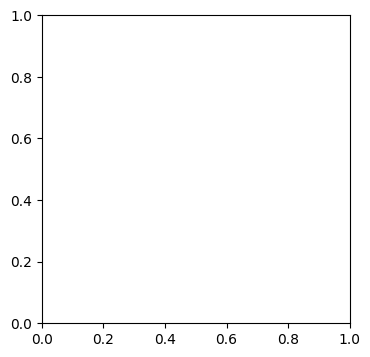

In [ ]:
sample_index  = torch.randint(len(train_data), size=(1,)).item()
# print(train_data.data[sample_index])
# print(type(train_data))
show_image(train_data.data[sample_index], make_capitalize(train_classes[train_data.targets[sample_index]]))

In [ ]:
BATCH = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH, shuffle=True)
# print(len(train_dataloader))
# print(len(test_dataloader))

# X_train , y_train = next(iter(train_dataloader))
# sample_index = torch.randint(len(range(BATCH)), size=(1,)).item()
# show_image(X_train[sample_index], label=train_classes[y_train[sample_index]])

In [ ]:
# train_classes = SAMPLED_INDEX
print(f"type-> {type(train_classes)} len->{len(train_classes)}")


type-> <class 'list'> len->10


In [ ]:
b, (x,y) = next(enumerate(train_dataloader))
x.shape

torch.Size([32, 3, 32, 32])

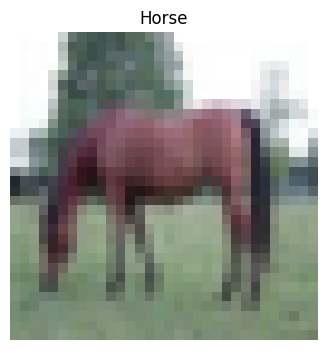

In [ ]:
sample_index = torch.randint(len(x), size=(1,)).item()
show_image(image=x[sample_index], label=make_capitalize(train_classes[y[sample_index]]), is_img_rgb=True)
# show_multi_images(data=x, classes=train_classes)


In [ ]:
class FashtionClassification(nn.Module):
  def __init__(self,input_channel,hidden_channel,output_channel):
    super().__init__()
    self.input_channel = input_channel
    self.hidden_channel = hidden_channel
    self.output_channel = output_channel

    self.layer1 = nn.Sequential(
                               nn.Conv2d(in_channels=self.input_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer2 = nn.Sequential(
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3)
                                ,nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer21 = nn.Sequential(
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3)
                                ,nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer3 = nn.Sequential(
                                nn.Flatten(),
                                nn.Linear(in_features=1152, out_features=100),
                                nn.ReLU(),
                                nn.Linear(in_features=100, out_features=self.output_channel)    ,                         
                                nn.ReLU(),
    )

  
  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))



In [ ]:
model0 = models.vgg16(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 240MB/s]


In [ ]:
# model0 = change_device(FashtionClassification(input_channel=3,hidden_channel=32,output_channel=len(train_classes)), device=DEVICE)

In [ ]:
model0 = change_device(tensor=model0,device=DEVICE)

In [ ]:
model0

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
summary(model0, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [ ]:
class CustomClassificationModel(nn.Module):
  def __init__(self, model_layers:int=1000,output_layer:int=100):
    super().__init__()
    self.net = model0
    self.classifier = nn.Sequential(
            nn.Linear(in_features=model_layers,out_features=300),
            nn.ReLU(),
            # nn.Dropout(p=0.3),
            # nn.Linear(in_features=output_layer+300,out_features=output_layer+200),
            # nn.ReLU(),
            # nn.Dropout(p=0.2),
            nn.Linear(in_features=300,out_features=output_layer)
            )
    for p in self.net.parameters():
      p.requires_grad = False
    
  def forward(self,x):
    return self.classifier(self.net(x))

In [ ]:
train_model = change_device(CustomClassificationModel(model_layers=1000,output_layer=len(train_classes)), device=
                            DEVICE)

In [ ]:
train_model

CustomClassificationModel(
  (net): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=Tr

In [ ]:
model0.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [ ]:
summary(train_model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [ ]:
train_model.classifier

Sequential(
  (0): Linear(in_features=1000, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=10, bias=True)
)

In [ ]:
DEVICE

'cuda'

In [ ]:
model0 = train_model

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters(), lr=0.0001)

In [ ]:
EPOCHS = 5
total_batches = 0
loss_metrics = []
accuracy_metrics = []

accuracy_fn = change_device(Accuracy(task="multiclass", num_classes=len(train_classes)),device=DEVICE)

for epoch in range(EPOCHS):
  model0.train()
  for batch, (X_data, y_train) in enumerate(train_dataloader):
    # print(f"epoch -> {batch} X_data->{X_data.shape} y_train->{y_train.shape}")
    # break
    X_data = change_device(tensor=X_data, device=DEVICE)
    y_train = change_device(tensor=y_train, device=DEVICE)

    y_pred = model0(X_data)#.to(torch.cuda.FloatTensor))
    # print(y_pred.shape)
    loss = loss_fn(y_pred,y_train)
    acc = accuracy_fn(y_pred,y_train)
    
    # if batch%20 == 0:
    #   loss_metrics.append(loss.item())
    #   accuracy_metrics.append(acc.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  for batch, (X_test, y_test) in enumerate(test_dataloader):
    # print(f"epoch -> {batch} X_test->{X_test.shape} y_test->{y_test.shape}")
    # break
    X_test = change_device(tensor=X_test, device=DEVICE)
    y_test = change_device(tensor=y_test, device=DEVICE)

    y_pred = model0(X_test)
    # print(y_pred.shape)
    loss_test = loss_fn(y_pred,y_test)
    acc_test = accuracy_fn(y_pred,y_test)  
    
    if batch%100 == 0:
      loss_metrics.append(loss.item())
      # accuracy_metrics.append(acc.item())
      print(f"loss-> {loss:.5f} loss_test->{loss_test:.5f} acc-> {acc:.5f} acc_test {acc_test:.5f}")
  # print(loss)
# print(loss_metrics[-1])
# print(accuracy_metrics[-1])

loss-> 1.97780 loss_test->1.62538 acc-> 0.25000 acc_test 0.46875
loss-> 1.97780 loss_test->1.60044 acc-> 0.25000 acc_test 0.53125
loss-> 1.97780 loss_test->1.90008 acc-> 0.25000 acc_test 0.28125
loss-> 1.97780 loss_test->1.70581 acc-> 0.25000 acc_test 0.40625
loss-> 1.63057 loss_test->1.51678 acc-> 0.62500 acc_test 0.46875
loss-> 1.63057 loss_test->1.96353 acc-> 0.62500 acc_test 0.34375
loss-> 1.63057 loss_test->1.68430 acc-> 0.62500 acc_test 0.40625
loss-> 1.63057 loss_test->1.66037 acc-> 0.62500 acc_test 0.37500
loss-> 1.56747 loss_test->1.65423 acc-> 0.50000 acc_test 0.50000
loss-> 1.56747 loss_test->1.64067 acc-> 0.50000 acc_test 0.43750
loss-> 1.56747 loss_test->1.59374 acc-> 0.50000 acc_test 0.43750
loss-> 1.56747 loss_test->1.82885 acc-> 0.50000 acc_test 0.37500
loss-> 1.61512 loss_test->1.50109 acc-> 0.50000 acc_test 0.46875
loss-> 1.61512 loss_test->1.53203 acc-> 0.50000 acc_test 0.40625
loss-> 1.61512 loss_test->1.96123 acc-> 0.50000 acc_test 0.37500
loss-> 1.61512 loss_test-

In [ ]:
model0.eval()
with torch.inference_mode():
  for batch, (X_test,y_test) in enumerate(test_dataloader):
    X_test = change_device(X_test, device=DEVICE)
    y_test = change_device(y_test, device=DEVICE)
    
    y_pred_test = model0(X_test)
    loss_test = loss_fn(y_pred_test,y_test)
    acc = accuracy_fn(y_pred_test,y_test)
  print(f"loss -> {loss_test:.5f} acc->{acc:.5f}")

loss -> 1.18129 acc->0.62500
